# Stock Analysis Returns

In [1]:
# Library
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
start = '2016-01-01'
end = '2019-01-01'

market = 'SPY'
symbol1 = 'AAPL'
symbol2 = 'MSFT'
symbol3 = 'AMD'
symbol4 = 'INTC'
bench = yf.download(market, start=start, end=end)
stock1 = yf.download(symbol1, start=start, end=end)
stock2 = yf.download(symbol2, start=start, end=end)
stock3 = yf.download(symbol3, start=start, end=end)
stock4 = yf.download(symbol4, start=start, end=end)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


## Calculate Daily Gains

In [3]:
#Daily gain for the stock
stock1["Gain"]=(stock1["Adj Close"].pct_change())*100
stock2["Gain"]=(stock2["Adj Close"].pct_change())*100
stock3["Gain"]=(stock3["Adj Close"].pct_change())*100
stock4["Gain"]=(stock4["Adj Close"].pct_change())*100

## Calculate the Mean and Variances of Daily Gains

In [4]:
print('Stock '+ symbol1 + ' Mean:', stock1["Gain"].mean())
print('Stock '+ symbol1 + ' Variances:', stock1["Gain"].var())

Stock AAPL Mean: 0.07176158262397078
Stock AAPL Variances: 2.2250639945491892


In [5]:
print('Stock '+ symbol2 + ' Mean:', stock2["Gain"].mean())
print('Stock '+ symbol2 + ' Variances:', stock2["Gain"].var())

Stock MSFT Mean: 0.10088954069328435
Stock MSFT Variances: 2.0235968045099493


In [6]:
print('Stock '+ symbol3 + ' Mean:', stock3["Gain"].mean())
print('Stock '+ symbol3 + ' Variances:', stock3["Gain"].var())

Stock AMD Mean: 0.34459086934253985
Stock AMD Variances: 19.3330778674231


In [7]:
print('Stock '+ symbol4 + ' Mean:', stock4["Gain"].mean())
print('Stock '+ symbol4 + ' Variances:', stock4["Gain"].var())

Stock INTC Mean: 0.06706428724452075
Stock INTC Variances: 2.5783495558348006


## Highest volatality and draw the histogram distribution of daily returns for all the stock

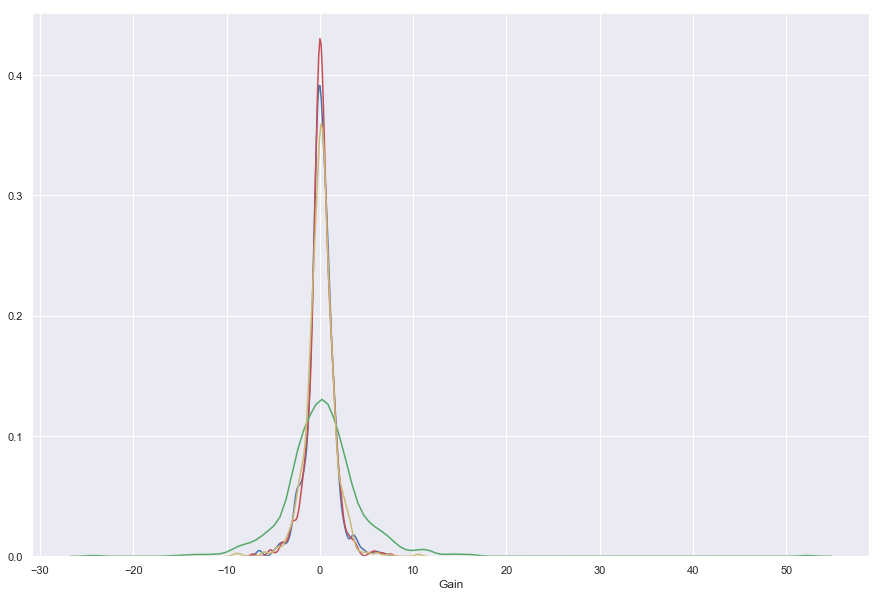

In [8]:
sns.set(rc={"figure.figsize": (15, 10)});
sns.distplot(stock1['Gain'], hist = False, color = 'b' )
sns.distplot(stock2['Gain'], hist = False, color = 'r' )
sns.distplot(stock3['Gain'], hist = False, color = 'g' )
sns.distplot(stock4['Gain'], hist = False, color = 'y' )

## Correlation

In [9]:
All_Stocks = pd.concat([stock1['Gain'],stock2['Gain'],stock3['Gain'],stock4['Gain']], axis=1)

In [10]:
names = ['AAPL', 'MSFT', 'AMD', 'INTC']
All_Stocks.columns = names

In [11]:
All_Stocks = All_Stocks.dropna()
All_Stocks

,AAPL,MSFT,AMD,INTC
Date,,,,
2016-01-05,-2.505943,0.456213,-0.722022,-0.470730
2016-01-06,-1.956978,-1.816536,-8.727273,-2.216973
2016-01-07,-4.220433,-3.478261,-9.163347,-3.748490
2016-01-08,0.528771,0.306692,-6.140351,-1.036431
2016-01-11,1.619202,-0.057342,9.345794,1.745483
2016-01-12,1.451340,0.917797,2.136752,1.933870
2016-01-13,-2.571009,-2.159906,-5.857741,-2.356170
2016-01-14,2.187060,2.846633,-1.777778,2.601050
2016-01-15,-2.401509,-3.991714,-8.144796,-9.102010


In [12]:
All_Stocks.corr()

,AAPL,MSFT,AMD,INTC
AAPL,1.000000,0.587342,0.270291,0.479345
MSFT,0.587342,1.000000,0.200654,0.603708
AMD,0.270291,0.200654,1.000000,0.264619
INTC,0.479345,0.603708,0.264619,1.000000


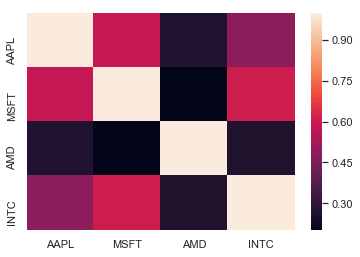

In [13]:
#Heat map
sns.set(rc={"figure.figsize": (6, 4)});
sns.heatmap( All_Stocks.corr())

### Monthly Returns

In [14]:
Stock1_Monthly = stock1.asfreq('M').ffill()
Stock2_Monthly = stock2.asfreq('M').ffill()
Stock3_Monthly = stock3.asfreq('M').ffill()
Stock4_Monthly = stock4.asfreq('M').ffill()

In [15]:
print('Monthly Returns')
print('Stock '+ symbol1 + ' Mean:', Stock1_Monthly["Gain"].mean())
print('Stock '+ symbol1 + ' Variances:', Stock1_Monthly["Gain"].var())

Monthly Returns
Stock AAPL Mean: 0.2862637568937698
Stock AAPL Variances: 0.7227331190053209


In [16]:
print('Monthly Returns')
print('Stock '+ symbol2 + ' Mean:', Stock2_Monthly["Gain"].mean())
print('Stock '+ symbol2 + ' Variances:', Stock2_Monthly["Gain"].var())

Monthly Returns
Stock MSFT Mean: 0.21547252764849448
Stock MSFT Variances: 1.1411972390607814


In [17]:
print('Monthly Returns')
print('Stock '+ symbol3 + ' Mean:', Stock3_Monthly["Gain"].mean())
print('Stock '+ symbol3 + ' Variances:', Stock3_Monthly["Gain"].var())

Monthly Returns
Stock AMD Mean: 0.32643003321886305
Stock AMD Variances: 7.488704333660259


In [18]:
print('Monthly Returns')
print('Stock '+ symbol4 + ' Mean:', Stock4_Monthly["Gain"].mean())
print('Stock '+ symbol4 + ' Variances:', Stock4_Monthly["Gain"].var())

Monthly Returns
Stock INTC Mean: 0.1408411967334154
Stock INTC Variances: 2.1223156784242296


## Monthly Returns with Box Plot

In [19]:
Stock1=np.array(Stock1_Monthly["Gain"])
Stock1= Stock1[~np.isnan(Stock1_Monthly["Gain"])]

Stock2 = np.array(Stock2_Monthly["Gain"])
Stock2=Stock2[~np.isnan(Stock2_Monthly["Gain"])]

Stock3 = np.array(Stock3_Monthly["Gain"])
Stock3=Stock3[~np.isnan(Stock3_Monthly["Gain"])]

Stock4 = np.array(Stock4_Monthly["Gain"])
Stock4=Stock4[~np.isnan(Stock4_Monthly["Gain"])]

AllStocks =[Stock1,Stock2,Stock3,Stock4]

[Text(0,0,'AAPL'), Text(0,0,'MSFT'), Text(0,0,'AMD'), Text(0,0,'INTC')]

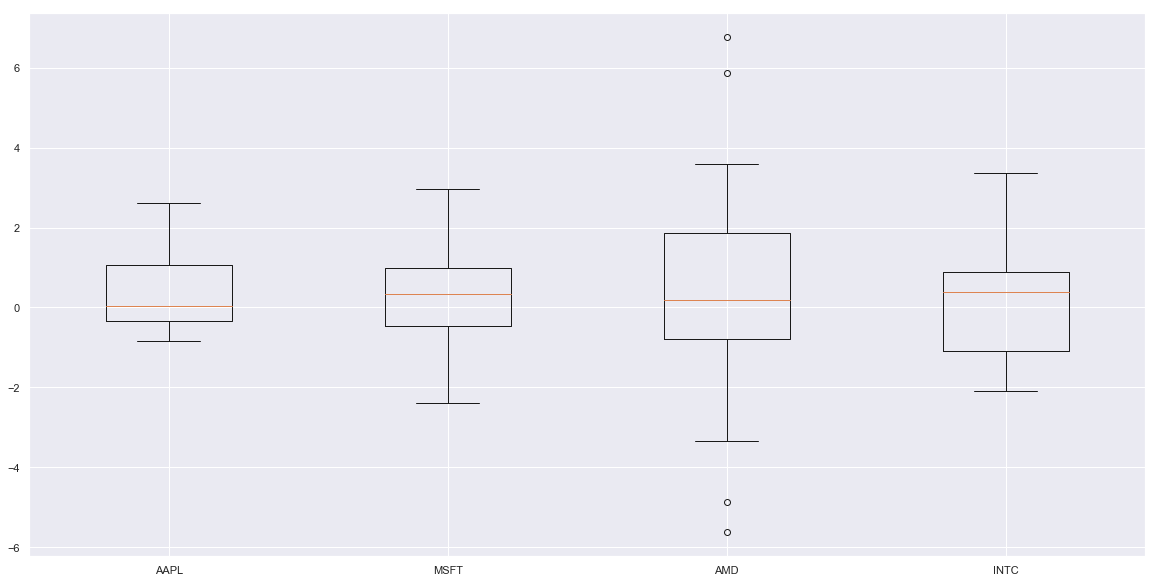

In [20]:
fig = plt.figure(1, figsize=(20, 10))
ax = fig.add_subplot(111)
bp = ax.boxplot(AllStocks)
ax.set_xticklabels([symbol1, symbol2, symbol3, symbol4])

## Stock with highest probability gains with 2% or more

In [21]:
#Probability of Stock1
stock1_p = 1-stats.norm.cdf( 0.02,
             loc=Stock1_Monthly["Gain"].mean(),
             scale=Stock1_Monthly["Gain"].std())

print(symbol1 + " probability of gains:", round(stock1_p, 2))

AAPL probability of gains: 0.62


In [22]:
stock2_p = 1-stats.norm.cdf( 0.02,
             loc=Stock2_Monthly["Gain"].mean(),
             scale=Stock2_Monthly["Gain"].std())

print(symbol2 + " probability of gains:", round(stock2_p, 2))

MSFT probability of gains: 0.57


In [23]:
stock3_p = 1-stats.norm.cdf( 0.02,
             loc=Stock3_Monthly["Gain"].mean(),
             scale=Stock3_Monthly["Gain"].std())

print(symbol3 + " probability of gains:", round(stock3_p, 2))

AMD probability of gains: 0.54


In [24]:
stock4_p = 1-stats.norm.cdf( 0.02,
             loc=Stock4_Monthly["Gain"].mean(),
             scale=Stock4_Monthly["Gain"].std())

print(symbol4 + " probability of gains:", round(stock4_p, 2))

INTC probability of gains: 0.53


## Stock with highest probability of loss with 2% or more

In [25]:
#Probability of Stock1
stock1_l = stats.norm.cdf(-0.02,
             loc=Stock1_Monthly["Gain"].mean(),
             scale=Stock1_Monthly["Gain"].std())

print(symbol1 + " probability of loss:", round(stock1_l, 2))

AAPL probability of loss: 0.36


In [26]:
stock2_l = stats.norm.cdf(-0.02,
             loc=Stock2_Monthly["Gain"].mean(),
             scale=Stock2_Monthly["Gain"].std())

print(symbol2 + " probability of loss:", round(stock2_l, 2))

MSFT probability of loss: 0.41


In [27]:
stock3_l = stats.norm.cdf(-0.02,
             loc=Stock3_Monthly["Gain"].mean(),
             scale=Stock3_Monthly["Gain"].std())

print(symbol3 + " probability of loss:", round(stock3_l, 2))

AMD probability of loss: 0.45


In [28]:
stock4_l = stats.norm.cdf(-0.02,
             loc=Stock4_Monthly["Gain"].mean(),
             scale=Stock4_Monthly["Gain"].std())

print(symbol4 + " probability of loss:", round(stock4_l, 2))

INTC probability of loss: 0.46


## Portfolio Analysis

In [29]:
x=np.array([Stock1_Monthly["Gain"].mean(),Stock2_Monthly["Gain"].mean(),Stock3_Monthly["Gain"].mean(),Stock4_Monthly["Gain"].mean()])
print(x)

[ 0.28626376  0.21547253  0.32643003  0.1408412 ]


In [30]:
#Weights of the stocks is 0.25 which is added up to 1
weights = np.array([0.25,0.25,0.25,0.25])
exp_val=np.sum(x*weights)

print("Expected Value is ",round(exp_val,4))
print("\n")
#Calculate Covariance matrix
y = np.vstack([Stock1,Stock2,Stock3,Stock4])

cov = np.cov(y)
print("Below is covariance matrix")
print("\n")
print(cov)

Expected Value is  0.2423


Below is covariance matrix


[[ 0.72273312  0.35454055  0.72956139  0.3469801 ]
 [ 0.35454055  1.14119724  1.49464282  0.49112976]
 [ 0.72956139  1.49464282  7.48870433  0.32942418]
 [ 0.3469801   0.49112976  0.32942418  2.12231568]]


In [31]:
#Calcualte the variance of monthly return of portfolio
covar=np.dot(weights.T,np.dot(cov,weights))
print("Variance of portfolio is ",round(covar,4))

Variance of portfolio is  1.1855


In [32]:
#Calculate the probability
1-stats.norm.cdf(0.005,
             loc=exp_val,
             scale=covar)

0.57931183676482079

In [33]:
# Create 25 Iteration of weights
# Generate a random number

number=range(1,26)

In [34]:
# Function to calculate expected value of portfolio and variance
def calculate(weights, meanReturns, covMatrix):
     
     portReturn = np.sum(weights*meanReturns)
     portVar = (np.dot(weights.T, np.dot(covMatrix, weights)))
     return portReturn, portVar

In [35]:
# Generate weights in random that sum to 1 
import random
random.seed(4)
d=[]
for i in number:
    weights = np.random.random(4)
    weights /= weights.sum()
    print("Set of random weight for Iterartion-->",i,"is", weights)
    pret, pvar = calculate(weights, x, cov)
    
    d.append((weights[0],weights[1],weights[2],weights[3],pret,pvar))
    df=pd.DataFrame(d,columns=('Stock1_weight','Stock2_weight','Stock3_weight','Stock4_weight','mean_return','var_return'))
    print("Mean monthly return for iteration-->",i,"is",pret)
    print("Variance of monthly return for iteration-->",i,"is",pvar)
    print("\n")

Set of random weight for Iterartion--> 1 is [ 0.3848186   0.36151152  0.16429325  0.08937663]
Mean monthly return for iteration--> 1 is 0.25427358196
Variance of monthly return for iteration--> 1 is 0.908980794775


Set of random weight for Iterartion--> 2 is [ 0.00454593  0.41422227  0.29738145  0.28385034]
Mean monthly return for iteration--> 2 is 0.227606915146
Variance of monthly return for iteration--> 2 is 1.57262314596


Set of random weight for Iterartion--> 3 is [ 0.24472972  0.41455793  0.30923541  0.03147695]
Mean monthly return for iteration--> 3 is 0.264760068295
Variance of monthly return for iteration--> 3 is 1.54778775312


Set of random weight for Iterartion--> 4 is [ 0.37906084  0.01872867  0.28758687  0.31462362]
Mean monthly return for iteration--> 4 is 0.250735852198
Variance of monthly return for iteration--> 4 is 1.26205610736


Set of random weight for Iterartion--> 5 is [ 0.2940364   0.39046648  0.09553035  0.21996676]
Mean monthly return for iteration--> 5 is 

In [36]:
# Dataframe containing stock weights,mean and variances of all possible portfolios
print(df)

    Stock1_weight  Stock2_weight  Stock3_weight  Stock4_weight  mean_return  \
0        0.384819       0.361512       0.164293       0.089377     0.254274   
1        0.004546       0.414222       0.297381       0.283850     0.227607   
2        0.244730       0.414558       0.309235       0.031477     0.264760   
3        0.379061       0.018729       0.287587       0.314624     0.250736   
4        0.294036       0.390466       0.095530       0.219967     0.230471   
5        0.381356       0.151785       0.268664       0.198195     0.257488   
6        0.113788       0.070419       0.453320       0.362474     0.246775   
7        0.055275       0.353076       0.451960       0.139689     0.259109   
8        0.472457       0.137790       0.311250       0.078503     0.277595   
9        0.057417       0.334970       0.360520       0.247093     0.241099   
10       0.274031       0.232362       0.356061       0.137546     0.264114   
11       0.133148       0.345505       0.391052     

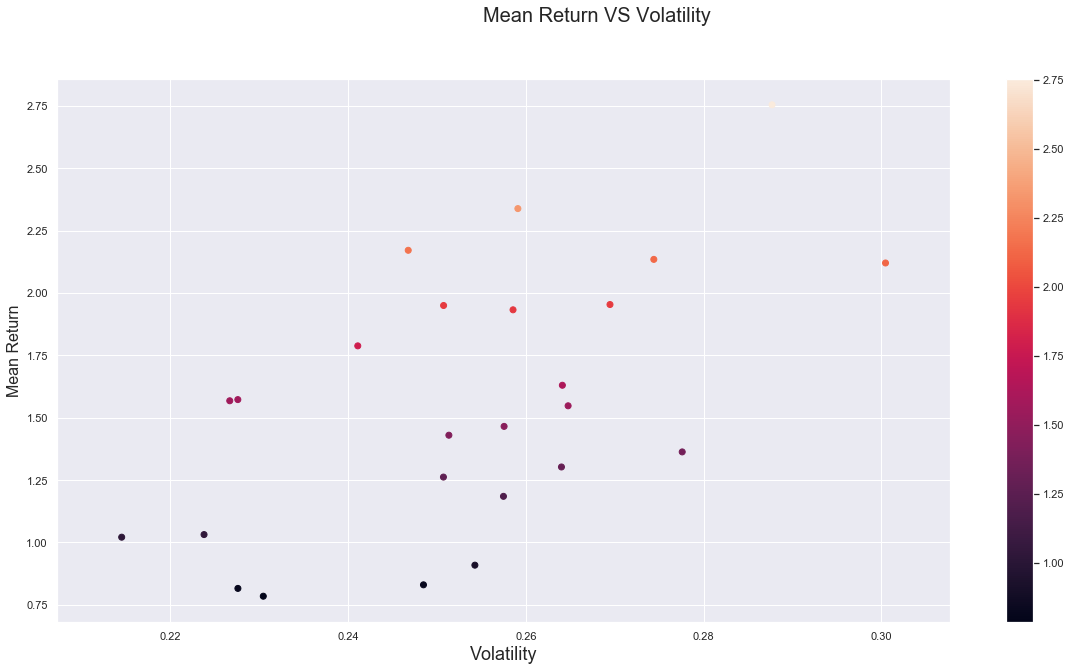

In [37]:
fig = plt.figure(1, figsize=(20, 10))
plt.scatter(df.mean_return,df.var_return, c=df.var_return)
plt.colorbar()
fig.suptitle('Mean Return VS Volatility', fontsize=20)
plt.xlabel('Volatility', fontsize=18)
plt.ylabel('Mean Return', fontsize=16)
plt.show()